In [1]:
!pip install ipyaladin mocpy

In [22]:
# Standard lib
from getpass import getpass

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

import astropy.units as u
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from astropy.wcs import WCS
from astropy.table import Table

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from mocpy import MOC

from ipyaladin import Aladin

from astropy.table import QTable
#from astropy.table import Table

In [3]:
query = 'SELECT TOP 25000 ra, dec, mag_auto_g, random_id FROM des_dr2.main WHERE random_id BETWEEN 25.0 AND 25.01'
#response = qc.query(sql = query, fmt = 'csv', out='vos://des_dr2.csv')
df = qc.query(sql = query, fmt = 'pandas')
print('des_dr2 catalog')
print (df)

des_dr2 catalog
               ra        dec  mag_auto_g  random_id
0      357.428715 -44.637259   23.489162  25.000000
1        5.969949 -43.527294   24.286612  25.000000
2       22.207492 -32.286238   25.298033  25.000000
3       29.788967 -32.981351   21.148296  25.000000
4       20.727107  -2.892649   25.397202  25.000000
...           ...        ...         ...        ...
24995   54.172207 -27.747459   24.843880  25.003592
24996   84.988716 -43.217000   27.056932  25.003592
24997   84.363729 -40.298618   26.280462  25.003592
24998   88.931305 -36.130207   99.000000  25.003592
24999   88.376329 -31.771497   23.679323  25.003592

[25000 rows x 4 columns]


In [4]:
aladin = Aladin(fov=2)
aladin

Aladin(fov=2.0, init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opaci…

In [58]:
#Provide MOC.from_longlat with ra and dec in degrees
#max_norder:The depth of the smallest HEALPix cells contained in the MOC.
ra1  = df['ra'].values
dec1 = df['dec'].values
mag1 = df['mag_auto_g'].values
ran1 = df['random_id'].values

des_dr2_moc = MOC.from_lonlat(
    ra1.transpose() * u.deg,
    dec1.transpose() * u.deg,
    max_norder=5,
)

In [56]:
#ran1 = str(ran1)
ra2  = list(ra1)
dec2 = list(dec1)
ran2 = list(ran1)

In [66]:
len(ran1)

25000

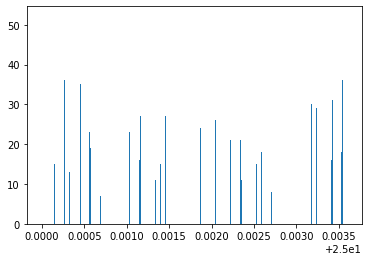

In [67]:
plt.hist(ran1,bins=20000)
plt.show()

In [50]:
#des_dr2
new_table1 = QTable([ra2, dec2, ran2],
             names=("ra", "dec", "random_id"),
             meta={"name":"des_dr2_v3"})

ValueError: Inconsistent data column lengths: {25000, 65}

In [ ]:
t = QTable(
    [ra, dec, name, parallax],
    names=("ra", "dec", "name", "parallax"),
    meta={"name": "my sample table"},
)

In [40]:
#aladin.add_table(new_table1,name='des_dr2_v2')
aladin.add_table(new_table1)

In [33]:
#Aladin?
ra1

array([357.428715,   5.969949,  22.207492, ...,  84.363729,  88.931305,
        88.376329])

In [42]:
ra2[0]

357.428715

In [44]:
#des_dr2
test_table = QTable([ra2[:3], dec2[:3], ['one','two','three']],
             names=("ra", "dec", "name"),
             meta={"name":"test"})

In [46]:
aladin.add_table(test_table,name='test_table')